##### Loan Application Status Prediction - Vinayak Ratan

##### Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

##### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

##### Dependent Variable (Target Variable):

- Loan_Status

###### You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_df = pd.read_csv(r'G:\AI Professional\Data Trained\Notes\Github docs\Datasets\DSData-master\loan_prediction.csv')
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Basic Information

In [3]:
# Shape
loan_df.shape

(614, 13)

In [4]:
# First 5 rows
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# last 5 rows
loan_df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
# Data type of each feature
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# Count of non null and data type of each column
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Exploratory Data Analysis

#### Checking for null values

In [8]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

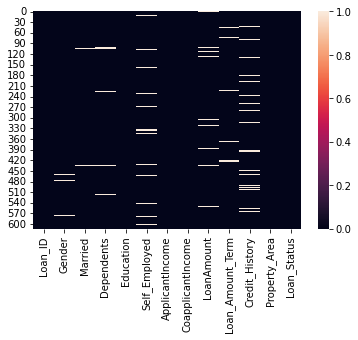

In [9]:
sns.heatmap(loan_df.isnull())

- There are 'NaN' values present in the dataset. Before imputing the values with mean, median or mode or random value let's first check each features then decide on what to be imputed

In [10]:
# First let's separate the categorical and numerical datatypes for plotting purpose
cat_loan = loan_df.select_dtypes(include=['object']).columns
num_loan = loan_df.select_dtypes(include = ['int32','int64','float32','float64']).columns

In [11]:
cat_loan

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
num_loan

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [13]:
## Lets check for value counts of each categorical variable except Loan_ID compared with total rows
for cl in cat_loan[1:]:
    print(loan_df[cl].value_counts())
    print(f'Total values in {cl} is {loan_df[cl].value_counts().sum()} for total rows of {loan_df.shape[0]}')
    print('----------------------------\n')

Male      489
Female    112
Name: Gender, dtype: int64
Total values in Gender is 601 for total rows of 614
----------------------------

Yes    398
No     213
Name: Married, dtype: int64
Total values in Married is 611 for total rows of 614
----------------------------

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Total values in Dependents is 599 for total rows of 614
----------------------------

Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Total values in Education is 614 for total rows of 614
----------------------------

No     500
Yes     82
Name: Self_Employed, dtype: int64
Total values in Self_Employed is 582 for total rows of 614
----------------------------

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Total values in Property_Area is 614 for total rows of 614
----------------------------

Y    422
N    192
Name: Loan_Status, dtype: int64
Total values in Loan_Status is 614 for total rows

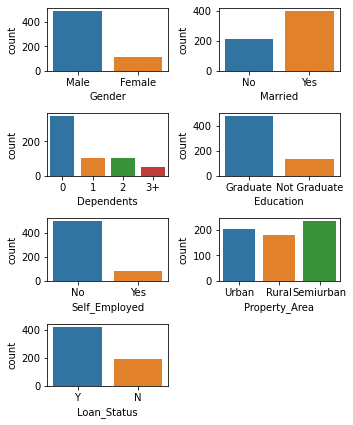

In [14]:
# Let's plot the above with count plot
plt.figure(figsize =(5,6))
p_no = 1

for cl1 in cat_loan[1:]:
    if p_no <= len(cat_loan):
        plt.subplot(4,2,p_no)
        sns.countplot(x = cl1, data = loan_df)
    p_no += 1
plt.tight_layout()

- More male than female
- More married people than unmarried
- many don't have dependents
- Most are graduate
- Few self employed
- Many have there loan approved than who don't

In [15]:
# Now lets impute the null values with mode for categorical variables
lst1 = ['Gender', 'Married','Dependents','Self_Employed']
for i in lst1:
    loan_df[i].fillna(value = loan_df[i].mode()[0], inplace =True)

In [16]:
# Let' check the for null values again
loan_df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Now we can see that there are no null values for categorical features

In [17]:
# Now we will impute with mean for missing values by grouping with respect to gender
loan_df['LoanAmount'].fillna(loan_df.groupby('Gender')['LoanAmount'].transform('mean'), inplace = True)
loan_df['Loan_Amount_Term'].fillna(loan_df.groupby('Gender')['Loan_Amount_Term'].transform('mean'), inplace = True)
loan_df['Credit_History'].fillna(loan_df.groupby('Gender')['Credit_History'].transform('mean'), inplace = True)

In [18]:
# Verify for missing values
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- Now there are no missing values

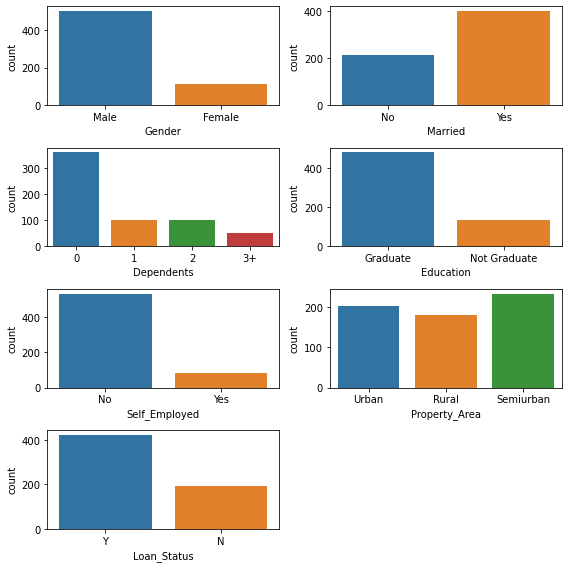

In [19]:
# Let's plot count plot once again after imputing
plt.figure(figsize =(8,8))
p_no = 1

for cl1 in cat_loan[1:]:
    if p_no <= len(cat_loan):
        plt.subplot(4,2,p_no)
        sns.countplot(x = cl1, data = loan_df)
    p_no += 1
plt.tight_layout()

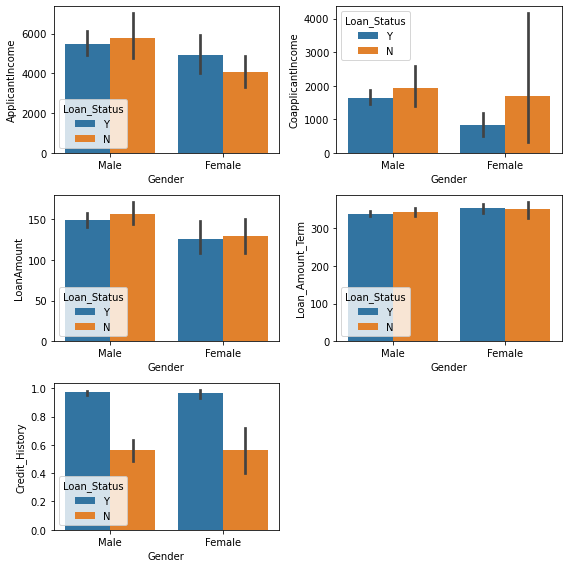

In [20]:
# Bar Plot for all numerical feature w.r.t 'Gender' and 'Loan_Status'
plt.figure(figsize =(8,8))
p_no = 1

for nl in num_loan:
    if p_no <= len(num_loan):
        plt.subplot(3,2,p_no)
        sns.barplot(x ='Gender' ,y = nl, hue = 'Loan_Status', data = loan_df)
    p_no += 1
plt.tight_layout()


- For Male: 
    - With Loan status yes income range 5000 to 6000, that with No have higher income from 5000 to 7000
- For Female:
    - With Loan status yes income range 4000 to 6000, that with No have less income from 3500 to 5000
- Coapplicants income without approval of loan have higher income range for both male and female
- Loan amount for male is higher than female
- Those with loan approved have higher credit history for both male and female

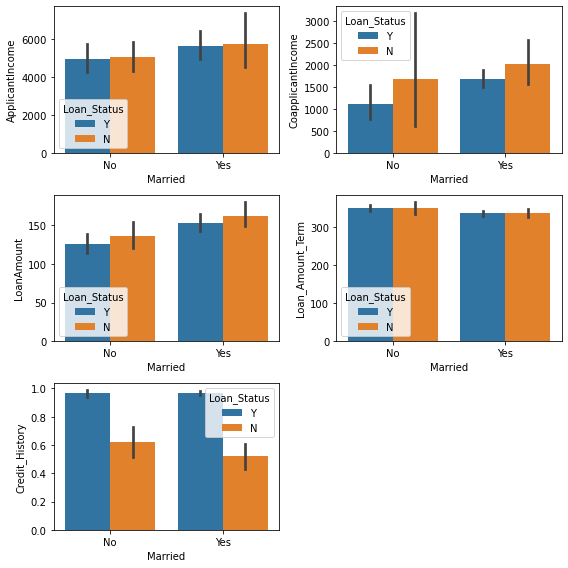

In [21]:
# Bar Plot for all numerical feature w.r.t 'Married' and 'Loan_Status'
plt.figure(figsize =(8,8))
p_no = 1

for nl in num_loan:
    if p_no <= len(num_loan):
        plt.subplot(3,2,p_no)
        sns.barplot(x ='Married' ,y = nl, hue = 'Loan_Status', data = loan_df)
    p_no += 1
plt.tight_layout()

- Applicants who are married have high income

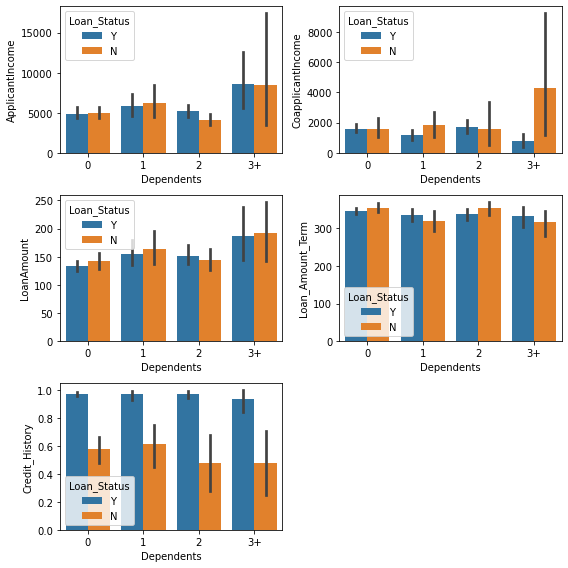

In [22]:
# Bar Plot for all numerical feature w.r.t 'Dependents' and 'Loan_Status'
plt.figure(figsize =(8,8))
p_no = 1

for nl in num_loan:
    if p_no <= len(num_loan):
        plt.subplot(3,2,p_no)
        sns.barplot(x ='Dependents' ,y = nl, hue = 'Loan_Status', data = loan_df)
    p_no += 1
plt.tight_layout()

- Applicants with more than 3 dependents have income both who's loan is approved or not and also same with coapplicant for non approved loans

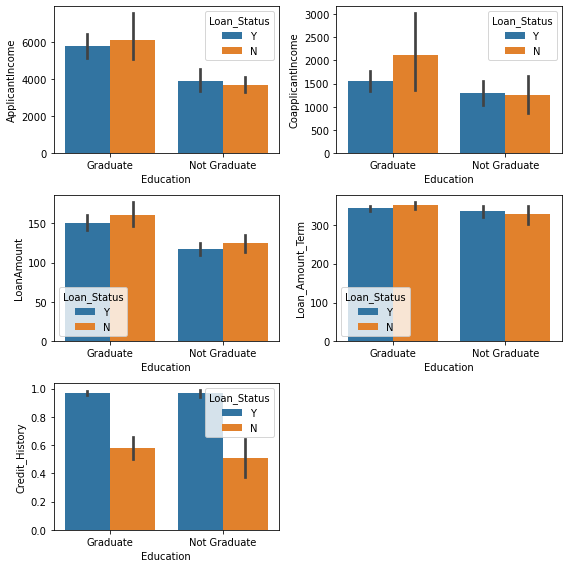

In [23]:
# Bar Plot for all numerical feature w.r.t 'Education' and 'Loan_Status'
plt.figure(figsize =(8,8))
p_no = 1

for nl in num_loan:
    if p_no <= len(num_loan):
        plt.subplot(3,2,p_no)
        sns.barplot(x ='Education' ,y = nl, hue = 'Loan_Status', data = loan_df)
    p_no += 1
plt.tight_layout()

- Graduated applicants have more income the not graduated and also the loan approval yes or no

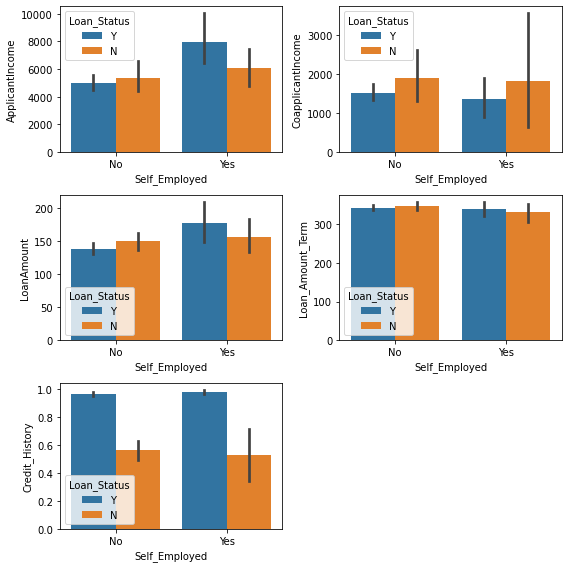

In [24]:
# Bar Plot for all numerical feature w.r.t 'Self_Employed' and 'Loan_Status'
plt.figure(figsize =(8,8))
p_no = 1

for nl in num_loan:
    if p_no <= len(num_loan):
        plt.subplot(3,2,p_no)
        sns.barplot(x ='Self_Employed' ,y = nl, hue = 'Loan_Status', data = loan_df)
    p_no += 1
plt.tight_layout()

- Self employed applicant is more with loan approval yes

#### Summary Statistics

In [25]:
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.453512,84.052424,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.009356,64.377243,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.842156,0.349684,0.0,1.00,1.0,1.00,1.0


- There is large difference between mean & median, 75th percentile and maximum value for Applicant income and CoApplicant income indicating the presence of outliers 
- Also, for loan amount difference b/w 75th percentile and maximum value is large indicating outliers 

#### Checking for Outliers

ApplicantIncome         AxesSubplot(0.125,0.657941;0.352273x0.222059)
CoapplicantIncome    AxesSubplot(0.547727,0.657941;0.352273x0.222059)
LoanAmount              AxesSubplot(0.125,0.391471;0.352273x0.222059)
Loan_Amount_Term     AxesSubplot(0.547727,0.391471;0.352273x0.222059)
Credit_History             AxesSubplot(0.125,0.125;0.352273x0.222059)
dtype: object

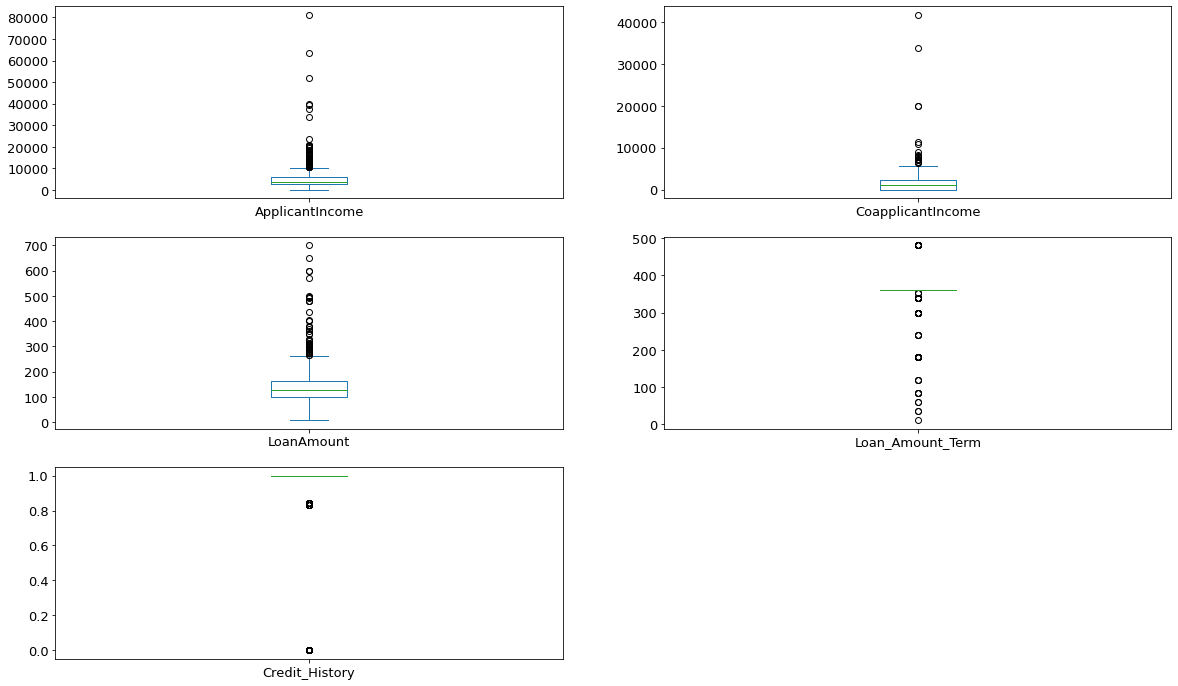

In [26]:
loan_df[num_loan].plot(kind='box', subplots = True, layout = (3,2), figsize = (20,12), fontsize = 13)

- Clearly see there are outliers present in all the numerical columns

In [27]:
# Let's see how many received loan approval with income greater than 5000
loan_df[(loan_df["Loan_Status"]=="Y") & (loan_df['ApplicantIncome'] > 5000)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,150.861284,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.000000,360.0,1.0,Urban,Y
25,LP001066,Male,Yes,0,Graduate,Yes,9560,0.0,191.000000,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.000000,360.0,1.0,Urban,Y
602,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.000000,360.0,1.0,Urban,Y
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.000000,360.0,1.0,Semiurban,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y


- 132 people received approval 

In [28]:
# Let's see how many received loan approval with income greater than 5000 w.r.t. Gender
loan_df[(loan_df["Loan_Status"]=="Y") & (loan_df['ApplicantIncome'] > 5000) & (loan_df['Gender'] == 'Female')]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,126.697248,360.0,1.0,Semiurban,Y
119,LP001422,Female,No,0,Graduate,No,10408,0.0,259.000000,360.0,1.0,Urban,Y
146,LP001516,Female,Yes,2,Graduate,No,14866,0.0,70.000000,360.0,1.0,Urban,Y
233,LP001776,Female,No,0,Graduate,No,8333,0.0,280.000000,360.0,1.0,Semiurban,Y
263,LP001871,Female,No,0,Graduate,No,7200,0.0,120.000000,360.0,1.0,Rural,Y
370,LP002194,Female,No,0,Graduate,Yes,15759,0.0,55.000000,360.0,1.0,Semiurban,Y
382,LP002231,Female,No,0,Graduate,No,6000,0.0,156.000000,360.0,1.0,Urban,Y
430,LP002377,Female,No,1,Graduate,Yes,8624,0.0,150.000000,360.0,1.0,Semiurban,Y
435,LP002393,Female,Yes,0,Graduate,No,10047,0.0,126.697248,240.0,1.0,Semiurban,Y
439,LP002407,Female,Yes,0,Not Graduate,Yes,7142,0.0,138.000000,360.0,1.0,Rural,Y


- Out of 132, 16 Female received loan approval and remaining Male

In [29]:
# Let's see how many received loan approval with Graduation
loan_df[(loan_df["Loan_Status"]=="Y") & (loan_df['Education'] == 'Graduate')]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,150.861284,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y


- Out of 480 graduates 340 got loan approval

In [30]:
# Let's see how many received loan approval with Graduation w.r.t Gender
loan_df[(loan_df["Loan_Status"]=="Y") & (loan_df['Education'] == 'Graduate') & (loan_df['Gender'] == 'Female')]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
29,LP001087,Female,No,2,Graduate,No,3750,2083.0,120.0,360.000000,1.0,Semiurban,Y
37,LP001112,Female,Yes,0,Graduate,No,3667,1459.0,144.0,360.000000,1.0,Semiurban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,352.293578,1.0,Urban,Y
49,LP001151,Female,No,0,Graduate,No,4000,2275.0,144.0,360.000000,1.0,Semiurban,Y
51,LP001157,Female,No,0,Graduate,No,3086,0.0,120.0,360.000000,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,LP002804,Female,Yes,0,Graduate,No,4180,2306.0,182.0,360.000000,1.0,Semiurban,Y
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.000000,1.0,Semiurban,Y
582,LP002894,Female,Yes,0,Graduate,No,3166,0.0,36.0,360.000000,1.0,Semiurban,Y
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.000000,1.0,Semiurban,Y


- Out of 340 loan approval applicants 61 are Female applicants

In [31]:
# Let's see how many received loan approval for Self employed
loan_df[(loan_df["Loan_Status"]=="Y") & (loan_df['Self_Employed'] == 'Yes')].count()

Loan_ID              56
Gender               56
Married              56
Dependents           56
Education            56
Self_Employed        56
ApplicantIncome      56
CoapplicantIncome    56
LoanAmount           56
Loan_Amount_Term     56
Credit_History       56
Property_Area        56
Loan_Status          56
dtype: int64

- 56 applicants received loan approval out of 82 self employed 

In [32]:
# Let's see how many received loan approval who are not Self employed
loan_df[(loan_df["Loan_Status"]=="Y") & (loan_df['Self_Employed'] == 'No')].count()

Loan_ID              366
Gender               366
Married              366
Dependents           366
Education            366
Self_Employed        366
ApplicantIncome      366
CoapplicantIncome    366
LoanAmount           366
Loan_Amount_Term     366
Credit_History       366
Property_Area        366
Loan_Status          366
dtype: int64

- Out of 500 not self employed 366 applicants received loan approval.

In [33]:
# Droping Loan_id column since it will not be required for model building
loan_df.drop(['Loan_ID'], axis = 1, inplace = True)

#### Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
loan_df['Gender']=le.fit_transform(loan_df['Gender'])
loan_df['Dependents']=le.fit_transform(loan_df['Dependents'])
loan_df['Education']=le.fit_transform(loan_df['Education'])
loan_df['Self_Employed']=le.fit_transform(loan_df['Self_Employed'])
loan_df['Property_Area']=le.fit_transform(loan_df['Property_Area'])
loan_df['Married']=le.fit_transform(loan_df['Married'])
loan_df['Loan_Status']=le.fit_transform(loan_df['Loan_Status'])

In [36]:
loan_df.sample()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
25,1,1,0,0,1,9560,0.0,191.0,360.0,1.0,1,1


#### Correlation

In [37]:
loan_df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.111113,-0.075518,0.014158,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.148174,-0.102149,0.006326,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.162224,-0.101383,-0.037307,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166901,-0.076611,-0.077823,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.114430,-0.034338,-0.002343,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565273,-0.045496,-0.014292,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.188201,-0.059974,-0.002178,0.010522,-0.059187
LoanAmount,0.111113,0.148174,0.162224,-0.166901,0.114430,0.565273,0.188201,1.000000,0.038878,-0.006995,-0.044838,-0.037114
Loan_Amount_Term,-0.075518,-0.102149,-0.101383,-0.076611,-0.034338,-0.045496,-0.059974,0.038878,1.000000,0.001512,-0.076628,-0.020812
Credit_History,0.014158,0.006326,-0.037307,-0.077823,-0.002343,-0.014292,-0.002178,-0.006995,0.001512,1.000000,-0.001869,0.540225


<AxesSubplot:>

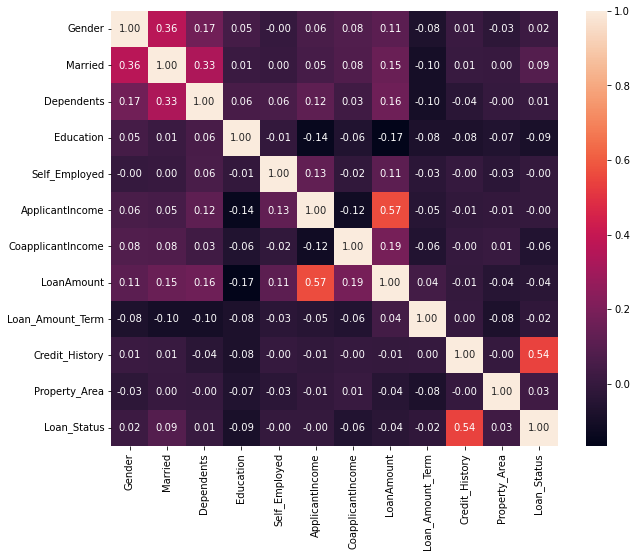

In [38]:
plt.figure(figsize = (10,8))
sns.heatmap(loan_df.corr(), annot = True, fmt ="0.2f")

- Credit history is highly correlated with target variable
- There is clear indication of presence of multicollinearity

#### Outliers

In [39]:
from scipy.stats import zscore
z = np.abs(zscore(loan_df))
z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,1.372089,0.737806,0.528362,0.392601,0.072991,0.554487,0.052484,0.279684,0.451758,1.223298,0.674519
1,0.472343,0.728816,0.253470,0.528362,0.392601,0.134412,0.038732,0.219727,0.279684,0.451758,1.318513,1.482537
2,0.472343,0.728816,0.737806,0.528362,2.547117,0.393747,0.554487,0.957963,0.279684,0.451758,1.223298,0.674519
3,0.472343,0.728816,0.737806,1.892641,0.392601,0.462062,0.251980,0.314983,0.279684,0.451758,1.223298,0.674519
4,0.472343,1.372089,0.737806,0.528362,0.392601,0.097728,0.554487,0.064935,0.279684,0.451758,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2.117107,1.372089,0.737806,0.528362,0.392601,0.410130,0.554487,0.898428,0.279684,0.451758,1.318513,0.674519
610,0.472343,0.728816,2.236021,0.528362,0.392601,0.212557,0.554487,1.267546,2.518614,0.451758,1.318513,0.674519
611,0.472343,0.728816,0.253470,0.528362,0.392601,0.437174,0.472404,1.268653,0.279684,0.451758,1.223298,0.674519
612,0.472343,0.728816,1.244745,0.528362,0.392601,0.357064,0.554487,0.482789,0.279684,0.451758,1.223298,0.674519


In [40]:
# List of array containing z-score greater than 3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [41]:
z.shape

(614, 12)

In [42]:
# Removing the rows with z score greater than 3
loan_df_new = loan_df[(z<3).all(axis=1)]
loan_df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,150.861284,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [43]:
# Checking the shape of the dataset before and after removing outliers
print("Old DataFrame:-", loan_df.shape)
print("New DataFrame:-", loan_df_new.shape)
print('Total dropped rows:-', loan_df.shape[0]-loan_df_new.shape[0])

Old DataFrame:- (614, 12)
New DataFrame:- (577, 12)
Total dropped rows:- 37


In [44]:
# Percentage loss of data
loss_percent_loan = (614-577)/577*100
print(loss_percent_loan,'%')

6.412478336221837 %


- Only 6.41% of data will be lost after removing outliers

#### Checking Skewness

In [45]:
loan_df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.109222
Loan_Amount_Term    -2.077017
Credit_History      -1.921449
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

- looks all the numerical columns are highly skewed

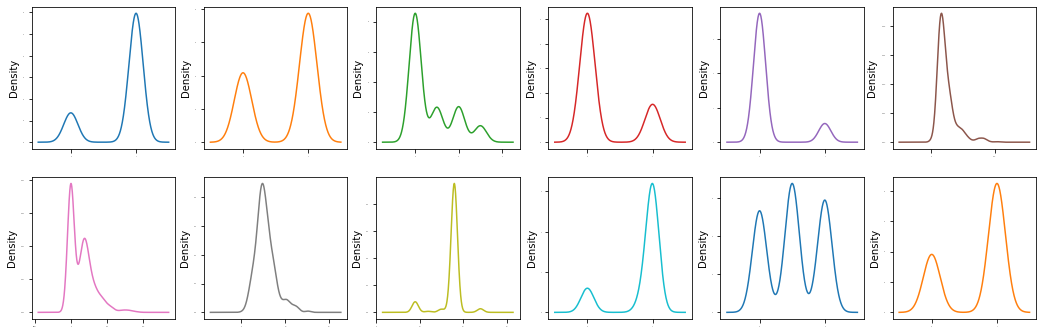

In [46]:
# Let's plot distribution plot
loan_df_new.plot(kind='density', subplots = True, layout = (4,6), sharex = False, legend= False, fontsize =1, figsize = (18,12))
plt.show()

In [47]:
loan_df_new.sample()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
310,0,0,0,0,0,2917,0.0,84.0,360.0,1.0,1,1


In [48]:
# Splitting the data into x and y
X = loan_df_new.iloc[:,:-1]
X.sample()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
191,1,0,0,0,0,12000,0.0,164.0,360.0,1.0,1


In [49]:
y = loan_df_new.iloc[:,-1]
y.sample()

48    0
Name: Loan_Status, dtype: int32

In [50]:
X.shape, y.shape

((577, 11), (577,))

In [51]:
# Lets remove the skewness using transformation
for index in X.skew().index:
    if X.skew().loc[index]>0:
        X[index]=np.log1p(X[index])
    if X.skew().loc[index]<0:
        X[index]=np.square(X[index])

In [52]:
X.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.712539
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.281130
CoapplicantIncome   -0.122698
LoanAmount          -0.188580
Loan_Amount_Term    -0.909814
Credit_History      -1.809589
Property_Area        0.545806
dtype: float64

- skewness is removed in few cases

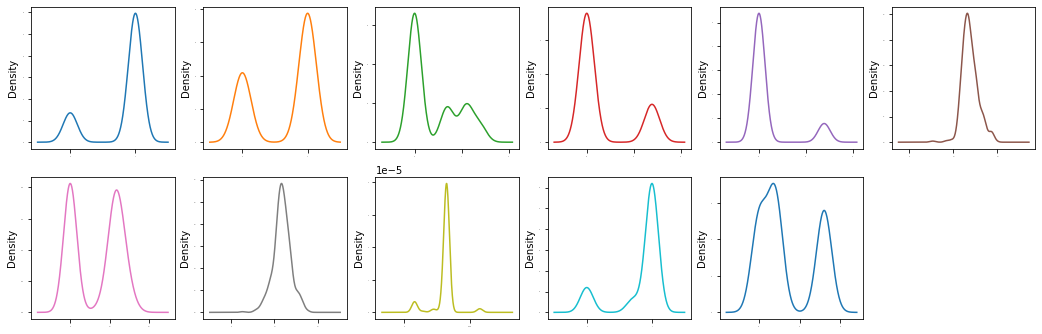

In [53]:
# Let's replot distribution plot after removing skewness
X.plot(kind='density', subplots = True, layout = (4,6), sharex = False, legend= False, fontsize =1, figsize = (18,12))
plt.show()

#### Checking variance inflation factor

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif_loan=pd.DataFrame()
    vif_loan['VIF_Factor']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_loan['features names']=X.columns
    print(vif_loan)

In [55]:
vif_calc()

    VIF_Factor     features names
0     6.570107             Gender
1     4.052407            Married
2     1.888231         Dependents
3     1.285537          Education
4     1.196298      Self_Employed
5    57.849703    ApplicantIncome
6     3.259971  CoapplicantIncome
7    55.806709         LoanAmount
8    14.124400   Loan_Amount_Term
9     6.261845     Credit_History
10    2.004616      Property_Area


- Even though the multicollinearity is present we cannot remove the any features

#### Scaling the data using MinMaxScaler

In [56]:
from sklearn.preprocessing import MinMaxScaler
mms_loan = MinMaxScaler()
X = mms_loan.fit_transform(X)
X

array([[1.        , 0.        , 0.        , ..., 0.49090909, 1.        ,
        1.        ],
       [1.        , 1.        , 0.5       , ..., 0.49090909, 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.49090909, 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.5       , ..., 0.49090909, 1.        ,
        1.        ],
       [1.        , 1.        , 0.79248125, ..., 0.49090909, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.49090909, 0.        ,
        0.25      ]])

### Model Building

#### SMOTE for imbalance

In [57]:
# Before proceeding with model building we need to apply SMOTE since the data is imbalanced
from imblearn.over_sampling import SMOTE
smt_loan = SMOTE()
train_x, train_y = smt_loan.fit_resample(X,y)

In [58]:
train_y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

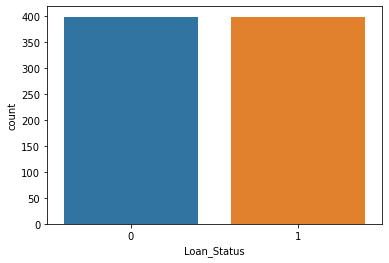

In [59]:
sns.countplot(data = train_y, x = train_y)

In [60]:
# Importing the model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [61]:
lg = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()

model = [lg, gnb, svc, dtc, knn, rfc]

In [62]:
# Maximum accuracy
maxAccu = 0 

# Best random state value for which accuracy is achieved 
maxRS = 0
for m in model:
    for i in range(0,500):
        x_train, x_test, y_train, y_test= train_test_split(train_x,train_y,test_size= 0.2, random_state=i)
        m.fit(x_train, y_train)
        train_score = m.score(x_train, y_train)
        test_score = m.score(x_train, y_train)
        pred = m.predict(x_test)
        print(f'----------------At random State {i} ------------------')
        acc = accuracy_score(y_test, pred)
        print("Accuracy score of ", m, 'is:', acc)
        print(f'Training score of {m} is {train_score}')
        print(f'Testing score of {m} is {test_score}')
        print('\n')
    
        if acc > maxAccu:
            maxAccu = acc
            maxRS = i
            print(f"Maximum accuracy score of {m} is {acc} at Random state {i}")
            print('\n')
    print('*'*120)

----------------At random State 0 ------------------
Accuracy score of  LogisticRegression() is: 0.70625
Training score of LogisticRegression() is 0.7342767295597484
Testing score of LogisticRegression() is 0.7342767295597484


Maximum accuracy score of LogisticRegression() is 0.70625 at Random state 0


----------------At random State 1 ------------------
Accuracy score of  LogisticRegression() is: 0.7375
Training score of LogisticRegression() is 0.7279874213836478
Testing score of LogisticRegression() is 0.7279874213836478


Maximum accuracy score of LogisticRegression() is 0.7375 at Random state 1


----------------At random State 2 ------------------
Accuracy score of  LogisticRegression() is: 0.7
Training score of LogisticRegression() is 0.7311320754716981
Testing score of LogisticRegression() is 0.7311320754716981


----------------At random State 3 ------------------
Accuracy score of  LogisticRegression() is: 0.7
Training score of LogisticRegression() is 0.7374213836477987
Test

In [63]:
print(f"Maximum accuracy score of {m} is {acc} at Random state {i}")

Maximum accuracy score of RandomForestClassifier() is 0.83125 at Random state 499


- Getting the Maximum accuracy score of RandomForestClassifier() is 0.9 at Random state 67

#### Cross validation of all the Algorithms

In [64]:
# Before proceeding with the hpyer parameter tunning we will check for cross validation
from sklearn.model_selection import cross_val_score
max_cvscore = 0 
max_cv = 0
for m in model:
    print(f'---------------------- Cross Validation of {m} --------------------------')
    for j in range(2,15):
        cv_score = cross_val_score(m, train_x,train_y,cv=j)
        cv_mean = cv_score.mean()
        print(f"At cross fold {j} the cv score is {cv_mean}")
        print('\n') 
    
        if cv_mean > max_cvscore:
            max_cvscore=cv_mean
            max_cv = j
            print(f"At cross fold {j} the Maximum CV score is {max_cvscore}")
            print('\n') 
    print('*'*120)
    print('\n')

---------------------- Cross Validation of LogisticRegression() --------------------------
At cross fold 2 the cv score is 0.7022613065326633


At cross fold 2 the Maximum CV score is 0.7022613065326633


At cross fold 3 the cv score is 0.7060244952002647


At cross fold 3 the Maximum CV score is 0.7060244952002647


At cross fold 4 the cv score is 0.7160804020100503


At cross fold 4 the Maximum CV score is 0.7160804020100503


At cross fold 5 the cv score is 0.7198899371069183


At cross fold 5 the Maximum CV score is 0.7198899371069183


At cross fold 6 the cv score is 0.709785828206881


At cross fold 7 the cv score is 0.7173131944906513


At cross fold 8 the cv score is 0.7122979797979798


At cross fold 9 the cv score is 0.7148025195778005


At cross fold 10 the cv score is 0.7173417721518988


At cross fold 11 the cv score is 0.7160647571606475


At cross fold 12 the cv score is 0.7148726066636515


At cross fold 13 the cv score is 0.7137249318634827


At cross fold 14 the cv sc

In [65]:
print(f"At cross fold {j} the Maximum CV score is {max_cvscore} for {m}")

At cross fold 14 the Maximum CV score is 0.8481691919191919 for RandomForestClassifier()


- At cross fold 8 the Maximum CV score is 0.8481691919191919 for RandomForestClassifier()

#### Training each algorithm for Random state 67

In [82]:
for m in model:
    x_train, x_test, y_train, y_test= train_test_split(train_x,train_y,test_size= 0.2, random_state=67)
    m.fit(x_train, y_train)
    train_score = m.score(x_train, y_train)
    test_score = m.score(x_train, y_train)
    pred = m.predict(x_test)
    print(f'--------------------- {m} ----------------------')
    acc_hr = accuracy_score(y_test, pred)
    print("Accuracy score of ", m, 'is:', acc)
    print(f'Training score of {m} is {train_score}')
    print(f'Testing score of {m} is {test_score}')
    print("Confusion Matrix:\n",confusion_matrix(y_test, pred))
    print('Classification Report:\n',classification_report(y_test, pred))
    print('*'*120,'\n')

--------------------- LogisticRegression() ----------------------
Accuracy score of  LogisticRegression() is: 0.83125
Training score of LogisticRegression() is 0.7154088050314465
Testing score of LogisticRegression() is 0.7154088050314465
Confusion Matrix:
 [[47 38]
 [ 9 66]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.55      0.67        85
           1       0.63      0.88      0.74        75

    accuracy                           0.71       160
   macro avg       0.74      0.72      0.70       160
weighted avg       0.74      0.71      0.70       160

************************************************************************************************************************ 

--------------------- GaussianNB() ----------------------
Accuracy score of  GaussianNB() is: 0.83125
Training score of GaussianNB() is 0.7279874213836478
Testing score of GaussianNB() is 0.7279874213836478
Confusion Matrix:
 [[44 41]
 [ 9 66]]
Clas

- One can clearly see that Random Forest is giving better results when we see at accuracy, Confusion matrix and Classification report

#### Hyper Parameter Tunning

In [68]:
from sklearn.model_selection import GridSearchCV

##### Tunning with Logistic Regression

In [83]:
param_lg = { 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'multi_class': ['auto', 'ovr', 'multinomial'],
             'penalty': ['l1', 'l2', 'elasticnet'],
              'C':[100, 10, 1.0, 0.1, 0.01]}

gcv_lg = GridSearchCV(lg,param_lg,cv=8,scoring= 'accuracy')

# training
gcv_lg.fit(x_train, y_train)

# Getting the best parameters
print("Best parameters:", gcv_lg.best_params_)

print("Best Estimator:",gcv_lg.best_estimator_)

gcv_lg_pred=gcv_lg.best_estimator_.predict(x_test)

print('Final Accuracy with Logistic Regression:', accuracy_score(y_test,gcv_lg_pred))

Best parameters: {'C': 0.01, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}
Best Estimator: LogisticRegression(C=0.01, multi_class='multinomial', solver='newton-cg')
Final Accuracy with Logistic Regression: 0.69375


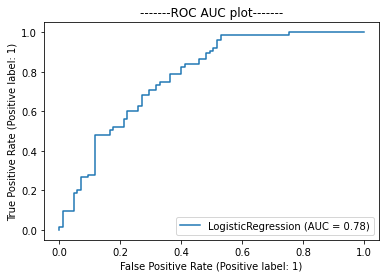

In [84]:
# ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gcv_lg.best_estimator_, x_test, y_test)
plt.title("-------ROC AUC plot-------")
plt.show()

##### Tunning with GaussianNB

In [85]:
param_gnb = {'var_smoothing': np.logspace(0,-9, num=100)}

gcv_gnb = GridSearchCV(gnb,param_gnb,cv=8,scoring= 'accuracy')

# training
gcv_gnb.fit(x_train, y_train)

# Getting the best parameters
print("Best parameters:", gcv_gnb.best_params_)

print("Best Estimator:",gcv_gnb.best_estimator_)

gcv_gnb_pred=gcv_gnb.best_estimator_.predict(x_test)

print('Final Accuracy with Gaussian Naive Bayes:', accuracy_score(y_test,gcv_gnb_pred))

Best parameters: {'var_smoothing': 0.0008111308307896872}
Best Estimator: GaussianNB(var_smoothing=0.0008111308307896872)
Final Accuracy with Gaussian Naive Bayes: 0.6875


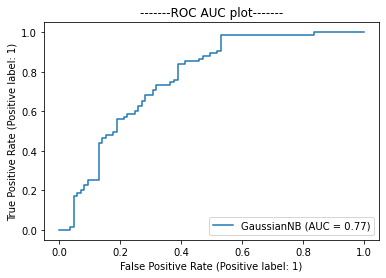

In [86]:
# ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gcv_gnb.best_estimator_, x_test, y_test)
plt.title("-------ROC AUC plot-------")
plt.show()

##### Tunning with support vector classifier

In [87]:
param_svc = {"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}

gcv_svc = GridSearchCV(svc,param_svc,cv=8,scoring= 'accuracy')

# training
gcv_svc.fit(x_train, y_train)

# Getting the best parameters
print("Best parameters:", gcv_svc.best_params_)

print("Best Estimator:",gcv_svc.best_estimator_)

gcv_svc_pred=gcv_svc.best_estimator_.predict(x_test)

print('Final Accuracy with Support Vector Classifier:', accuracy_score(y_test,gcv_svc_pred))

Best parameters: {'C': 10, 'kernel': 'poly'}
Best Estimator: SVC(C=10, kernel='poly')
Final Accuracy with Support Vector Classifier: 0.7625


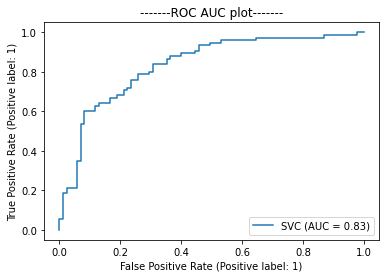

In [88]:
# ROC curve
plot_roc_curve(gcv_svc.best_estimator_, x_test, y_test)
plt.title("-------ROC AUC plot-------")
plt.show()

##### Tunning with Decision Tree Classifier

In [89]:
param_dtc = {'max_depth': [2, 3, 5, 10, 20],'min_samples_leaf': [5, 10, 20, 50, 100],'criterion': ["gini", "entropy"]}

gcv_dtc = GridSearchCV(dtc,param_dtc,cv=8,scoring= 'accuracy')

# training
gcv_dtc.fit(x_train, y_train)

# Getting the best parameters
print("Best parameters:", gcv_dtc.best_params_)

print("Best Estimator:",gcv_dtc.best_estimator_)

gcv_dtc_pred=gcv_dtc.best_estimator_.predict(x_test)

print('Final Accuracy with Decision Tree Classifier:', accuracy_score(y_test,gcv_dtc_pred))

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}
Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5)
Final Accuracy with Decision Tree Classifier: 0.76875


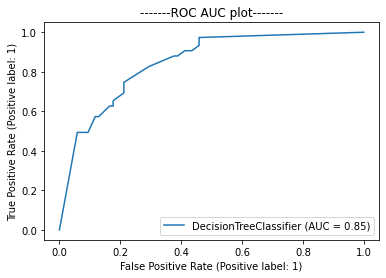

In [90]:
# ROC curve
plot_roc_curve(gcv_dtc.best_estimator_, x_test, y_test)
plt.title("-------ROC AUC plot-------")
plt.show()

##### Tunning with K Neighbor classifier

In [91]:
param_knn = {'n_neighbors' : [5,7,9,11,13,15],
            'weights' : ['uniform','distance'],
            'metric' : ['minkowski','euclidean','manhattan']}

gcv_knn = GridSearchCV(knn,param_knn,cv=8,scoring= 'accuracy')

# training
gcv_knn.fit(x_train, y_train)

# Getting the best parameters
print("Best parameters:", gcv_knn.best_params_)

print("Best Estimator:",gcv_knn.best_estimator_)

gcv_knn_pred=gcv_knn.best_estimator_.predict(x_test)

print('Final Accuracy with K Neighbor Classifier:', accuracy_score(y_test,gcv_knn_pred))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Estimator: KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')
Final Accuracy with K Neighbor Classifier: 0.85625


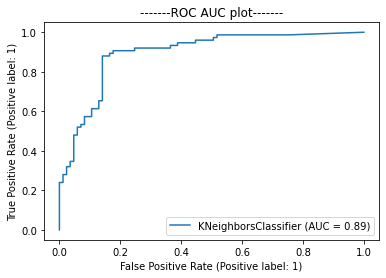

In [92]:
# ROC ROC curve
plot_roc_curve(gcv_knn.best_estimator_, x_test, y_test)
plt.title("-------ROC AUC plot-------")
plt.show()

##### Tunning With Random Forest Classifier

In [93]:
param_rfc = {'n_estimators': [100,200],'max_features': ['auto', 'sqrt'],
             'max_depth': [10, 20],
             'min_samples_split': [6, 10],'min_samples_leaf': [1, 3]}

gcv_rfc = GridSearchCV(rfc,param_rfc,cv=8,scoring= 'accuracy')

# training
gcv_rfc.fit(x_train, y_train)

# Getting the best parameters
print("Best parameters:", gcv_rfc.best_params_)

print("Best Estimator:",gcv_rfc.best_estimator_)

gcv_rfc_pred=gcv_rfc.best_estimator_.predict(x_test)

print('Final Accuracy with Random Forest Classifier:', accuracy_score(y_test,gcv_rfc_pred))

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=10)
Final Accuracy with Random Forest Classifier: 0.8


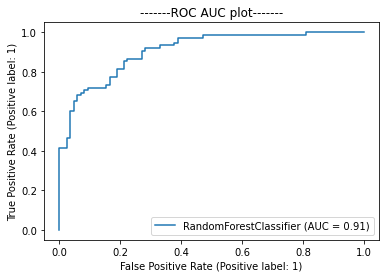

In [94]:
# ROC ROC curve
plot_roc_curve(gcv_rfc.best_estimator_, x_test, y_test)
plt.title("-------ROC AUC plot-------")
plt.show()

- We have best AUC-ROC curve with Random Forest classifier
- Deploying the model with Random forest classifier

### Pickling

In [96]:
# Pickling of the file or serialization of a file
# Random Forest Classifier
import joblib
joblib.dump(gcv_rfc.best_estimator_,"Loan_Application_RFC.pkl")

['Loan_Application_RFC.pkl']

In [97]:
loan_model_rfc = joblib.load('Loan_Application_RFC.pkl')
loan_result_rfc = loan_model_rfc.score(x_test, y_test)
print(loan_result_rfc*100)

80.0


#### Conclusion

In [99]:
loan_conclusion = pd.DataFrame([loan_model_rfc.predict(x_test),y_test], index=['Predicted Loan Status', 'Original Loan Status'])
loan_conclusion.T

,Predicted Loan Status,Original Loan Status
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
155,1,1
156,0,0
157,0,1
158,1,1


In [100]:
loan_conclusion.T[['Predicted Loan Status', 'Original Loan Status']].value_counts()

Predicted Loan Status  Original Loan Status
1                      1                       66
0                      0                       62
1                      0                       23
0                      1                        9
dtype: int64

###### We can see that model is predicting well 
###### Out of 160 test data model is predicting accurately on 66+62 = 138 occasions and wrong on 23+9 = 32 occasions

### Thank You